In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load pictures and labels:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def load_pictures(link):
    with open(link, 'rb') as f:
        f.read(16)
        buffer = f.read()
        pictures = np.frombuffer(buffer, dtype=np.uint8).reshape(-1, 28, 28)
    return pictures

def load_labels(link):
    with open(link, 'rb') as f:
        f.read(8)
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

train_images = load_pictures('/content/drive/MyDrive/MÁSTER/IC/P1/Train/train-images.idx3-ubyte')
train_labels = load_labels('/content/drive/MyDrive/MÁSTER/IC/P1/Train/train-labels.idx1-ubyte')

evaluation_images = load_pictures('/content/drive/MyDrive/MÁSTER/IC/P1/Evaluation/t10k-images.idx3-ubyte')
evaluation_labels = load_labels('/content/drive/MyDrive/MÁSTER/IC/P1/Evaluation/t10k-labels.idx1-ubyte')

train_images = train_images / 255.0
evaluation_images = evaluation_images / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
evaluation_images = evaluation_images.reshape(-1, 28, 28, 1)

In [ ]:
# Neural network:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
evaluation_labels = to_categorical(evaluation_labels)

model = Sequential([
    # First convulative layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convulative layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    # Fully connected layer:
    Dense(128, activation='relu'),

    # Output layer:
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8967 - loss: 0.3352 - val_accuracy: 0.9831 - val_loss: 0.0587
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9846 - loss: 0.0507 - val_accuracy: 0.9869 - val_loss: 0.0442
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9890 - loss: 0.0328 - val_accuracy: 0.9827 - val_loss: 0.0638
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9936 - loss: 0.0215 - val_accuracy: 0.9895 - val_loss: 0.0419
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9946 - loss: 0.0161 - val_accuracy: 0.9898 - val_loss: 0.0374
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9968 - loss: 0.0097 - val_accuracy: 0.9876 - val_loss: 0.0455
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - accuracy: 0.9965 - loss: 0.0099 - val_accuracy: 0.9905 - val_loss: 0.0463
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9978 -

In [ ]:
# Train set :
_, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

# Evaluation set:
_, evaluation_accuracy = model.evaluate(evaluation_images, evaluation_labels, verbose=0)
print(f"Evaluation Accuracy: {evaluation_accuracy * 100:.2f}%")

Train Accuracy: 99.72%
Evaluation Accuracy: 99.14%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


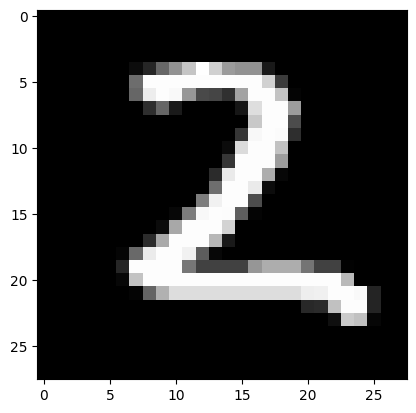

Predicted Label: 2
Actual Label: 2


In [ ]:
import random

def predict_random_image():
    random_index = random.randint(0, len(train_images) - 1)
    random_image = train_images[random_index]
    random_image = random_image.reshape(1, 28, 28)

    prediction = model.predict(random_image)
    predicted_label = np.argmax(prediction)

    plt.imshow(train_images[random_index], cmap='gray')
    plt.show()

    print(f"Predicted Label: {predicted_label}")
    print(f"Actual Label: {np.argmax(train_labels[random_index])}")

predict_random_image()